In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.enable_eager_execution()
tf.set_random_seed(777)  # for reproducibility

linear regression이 classification에서 사용될 수 없는 이유.

Problem #1: Predicted value is continuous, not probabilistic

linear regression은 0~1가 아닌 다른 범위에 있는 숫자 생성 가능

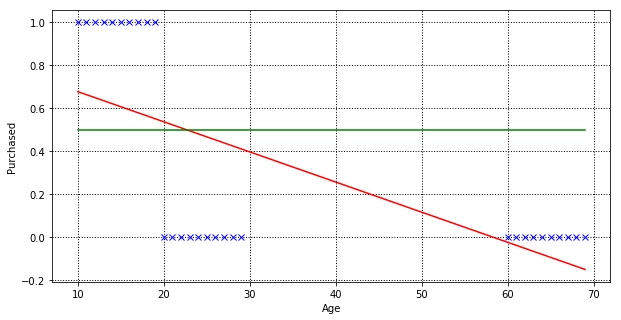

Problem #2: Sensitive to imbalance data

특정 범위에 데이터가 몰려있으면 전체 데이터에 대한 line을 잘 표현 못할 수 있음.

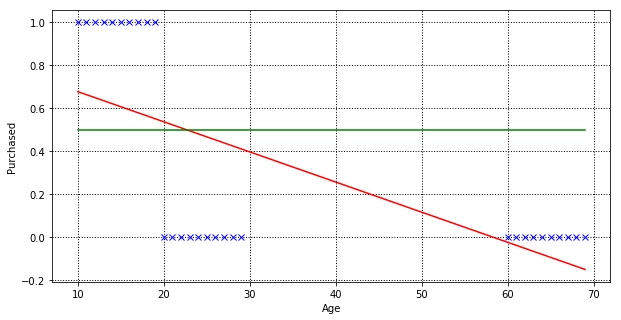

https://jinglescode.github.io/datascience/2019/05/07/why-linear-regression-is-not-suitable-for-classification/

logistic regression 원리

https://www.internalpointers.com/post/cost-function-logistic-regression

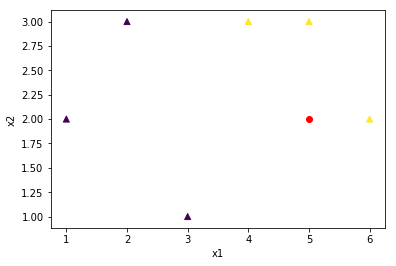

In [38]:
x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

x1_data = [x[0] for x in x_train]
x2_data = [x[1] for x in x_train]
y_data = [int(y[0]) for y in y_train]

plt.scatter(x1_data,x2_data, c=y_data , marker='^') #scatter(x,y,maker = None,color = None) -> coler에 iterable이 들어가면 값에 따라 color 배정
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [52]:
dataSet = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(len(x_train)) 
# tf.data.DataSet -> 데이터 입력 파이프라인, 한번에 여러개의 데이터를 가져오기위해
learning_rate = 0.1

def sigmoid(x):
    result = 1 / (1 + tf.exp(-x))
    return result

def cost(x,y):
    result = -y * tf.log(x) - (1 - y) * tf.log(1-x)
    return result
    
W = tf.Variable(tf.random_normal([2,1]), name = "weight")
b = tf.Variable(tf.random_normal([1]), name = "bias")

for i in range(1001):
    sum = 0
    with tf.GradientTape() as tape:
        for x,y in iter(dataSet): #Loss를 구함.
            sum += cost(sigmoid(tf.matmul(x,W) + b), y)
        j = tf.reduce_mean(sum)
    if i % 100 == 0:
        print("iter : {}, loss : {:.4f}".format(i,j))
    W_grad, b_grad = tape.gradient(j,[W,b])
    W.assign_sub(W_grad * learning_rate)
    b.assign_sub(b_grad * learning_rate)
    

        

iter : 0, loss : 0.9169
iter : 100, loss : 0.5041
iter : 200, loss : 0.4202
iter : 300, loss : 0.3564
iter : 400, loss : 0.3068
iter : 500, loss : 0.2678
iter : 600, loss : 0.2370
iter : 700, loss : 0.2121
iter : 800, loss : 0.1918
iter : 900, loss : 0.1750
iter : 1000, loss : 0.1608


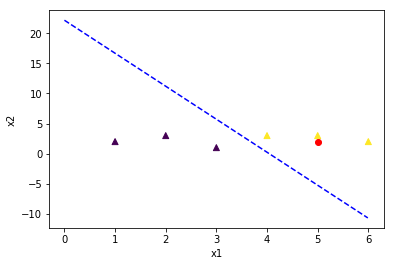

In [53]:
plt.scatter(x1_data,x2_data, c=y_data , marker='^') #scatter(x,y,maker = None,color = None) -> coler에 iterable이 들어가면 값에 따라 color 배정
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")

x = np.arange(0,6,0.01)
x_2 = (-W[0] * x - b + 0.5) / W[1]

plt.plot(x, x_2, ls = "dashed", color = "b")
plt.show()